# COGS 108 - Final Project (change this to your project's title)

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ `X` ] YES - make available
* [  ] NO - keep private

# Overview

*This project aims to investigate student's satisfaction measured by review ratings under the influence of courses' charactirzation such as course durations, course price, and diffculty levels etc. We employed regression and hypothesis test to explore the potential realtionships between the mentioned varibales and the average course ratings. We found that course durations/lecture count has a postive correlation with average course ratings and difficulty levels actually plays a less important role.*

# Names

- Luming Jin
- Xiaoke Li
- Haowei Li
- Yunfei Yang
- Tengyue Wang

<a id='research_question'></a>
# Research Question

**How well can we predict students'satisfaction/review scores for online courses using key metrics that represent course design, such as course difficulty, course price, and course duration etc?**

<a id='background'></a>

## Background & Prior Work

Online learning has revolutionized access to education, providing people worldwide with opportunities to learn about various topics. As an evolving learning method that relies on platform and technology, online courses require constant revisions to fit with students’ needs. However, instructional designers may sometimes overlook non-teaching factors when developing courses, which can result in lower student satisfaction rates and enrollment [^Yu]. To bridge the gap between designers and users and enhance the learning experience, it is essential to analyze large data sets covering various aspects of online courses. 


The use of educational data to inform online learning experience is not a novel concept. In 2006, the study by Romero and Ventura discussed how statistical analysis such as regression could be applied to learning time and number of attempts to design effective educational systems [^Ventura and Romero]. Additionally, text mining was also used to evaluate specific knowledge grasp by students through online discussion [^Ventura and Romero]. This study points out how educational data can be used to measure learning outcomes and satisfaction in web-based courses. In 2008, another study utilized structural equation analysis, a multivariate analysis, to investigate the relationship between student’s perceptions on their computer ability, usefulness and flexibility in online courses, and their satisfaction with remote learning [^Sahin and Shelley]. The study found that all the three factors on students’ perceptions were positively correlated with student satisfaction in distance learning. 

Building upon previous research on students’ attitudes about online learning, recent studies focus on more accurate predictors in course design to improve students’ online learning experience. A study found that module designs manage course workload and flexibility, such as assessment frequency, duration of course, number of classes, level of difficulty, are all related to learning satisfaction [^Li, Marsh and Rienties]. In this study, overall student satisfaction data is collected, and the degree of influence for each block of predictors was measured by logistic regression analysis. Further study provided evidence for module difficulty being an important factor influencing students’ satisfaction in online learning [^Sutherland, Warwick and Anderson]. Similarly, through a regression analysis on survey data, another study found that non-teaching factors such as price and class size also affect students’ online learning experience, while teacher credentials are not a significant predictor [^Wart, Ni, Ready,Shayo, and Court]. 


 **Reference:**

[^Yu]:(12 Apr 2022) Factors Influencing Online Learning Satisfaction.  *Frontiers in Psychology*
https://www.frontiersin.org/articles/10.3389/fpsyg.2022.852360/full 

[^Ventura and Romero]: Romero, C., & Ventura, S. (2007). Educational data mining: A survey from 1995 to 2005. *Expert Systems With Applications, 33(1), 135–146. *
https://doi.org/10.1016/j.eswa.2006.04.005

[^Sahin and Shelley]:Considering Students’ Perceptions: The Distance Education Student Satisfaction Model on JSTOR. (n.d.). https://www.jstor.org/stable/pdf/jeductechsoci.11.3.216.pdf

[^Li, Marsh and Rienties]: Li, N., Marsh, V., & Rienties, B. (2016). Modelling and Managing Learner Satisfaction: Use of Learner Feedback to Enhance Blended and Online Learning Experience. *Decision Sciences Journal of Innovative Education, 14(2), 216–242.* https://doi.org/10.1111/dsji.12096

[^Sutherland, Warwick and Anderson]: Sutherland, D., Warwick, P., & Anderson, J. R. (2019). What factors influence student satisfaction with module quality? A comparative analysis in a UK business school context. *The International Journal of Management Education, 17(3), 100312.* https://doi.org/10.1016/j.ijme.2019.100312

[^Wart, Ni, Ready,Shayo, and Court]: Factors leading to Online Learner Satisfaction. 
California State University San Bernardino - California, USA
http://www.elmstreetpress.com/images/V12_N1_draft_8_28.pdf#page=14 

# Hypothesis



Our study aims to examine what key course components impact online course ratings. We hypothesize that courses designed for different levels will have different average ratings, and that elements such as price and course duration might affect students' overall learning experience and thus the overall rating. By examining these variables, we seek to identify and predict potential relationships between these key elements and students' satisfaction towards course.

# Dataset(s)


- Dataset Name: Udemy Courses - Top 5000 Course 2022
- Link to the dataset: https://www.kaggle.com/datasets/mahmoudahmed6/udemy-top-5k-course-2022
- Number of observations: 5027

dataset describtion: 
The dataset we used for this project is from Kaggle. This dataset titied "Udemy Courses - Top 5000 Course 2022", with data scraped on 9/11/2022, provides a comprehensive look at the top 5000 courses on Udemy. The data updates every 3 to 6 months.

The dataset includes the following columns:

- course_name: This is the name of the course.
- instructor: This denotes the instructor of the course.
- course_url: This is the URL of the course.
- course_image: This is the image of the course.
- course_description: This is the course subtitle and contains information about the course content.
- reviews_avg: This is the average review score of the course.
- reviews_count: This represents the number of reviews for each course.
- course_duration: This is the duration of the course in hours.
- lectures_count: This is the number of lectures in each course.
- level: This is the course level on Udemy.
- price_after_discount: This is the course price in Egyptian pounds (EGP) after discount.
- main_price: This is the original course price.
- course_flag: This is the course flag like (best seller, hot, new, etc.)
- students_count: This is the number of students in each course.

The dataset provides a rich source of information for examining trends and patterns in online learning especially in the field of development. By using this data, we aim to gain insights into various aspects; for example, the popularity of courses, the relationship between price and popularity, the impact of course duration on student numbers. These insights could be valuable for educators, online learning platforms, helping them make informed decisions when taking online courses.

# Setup

In [1]:
%matplotlib inline
import os
import pickle
import warnings
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, datetime, timedelta
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import ttest_ind, chisquare, normaltest
warnings.filterwarnings('ignore')
plt.style.use("fivethirtyeight")

# Data Cleaning

1. Get rid of columns with all NAN Values 

2. Drop un-neccesary columns: course image link, course_flag 

3. Drop rows with nan for main_price or price_after_discount

4. We want to convert strings to float/int for the following columns to prepare for our further analysis: 
   price_after_discount, main_price,students_count, review_avg, reviews_count, course_duration,lectures_count.

5. Add one more colums for price percentage 

In [2]:
online_course=pd.read_csv("data.csv")
online_course.head()

,course_name,instructor,course url,course image,course description,reviews_avg,reviews_count,course_duration,lectures_count,level,price_after_discount,main_price,course_flag,students_count,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2022 Complete Python Bootcamp From Zero to Her...,Jose Portilla,https://www.udemy.com/course/complete-python-b...,https://img-b.udemycdn.com/course/240x135/5678...,Learn Python like a Professional Start from t...,Rating: 4.6 out of 5,440383 reviews,22 total hours,155 lectures,All Levels,Current price: E£319.99,"Original price: E£1,399.99",NaN,"1,629,692 students",NaN,NaN,NaN,NaN
1,The Web Developer Bootcamp 2022,Colt Steele,https://www.udemy.com/course/the-web-developer...,https://img-b.udemycdn.com/course/240x135/6252...,COMPLETELY REDONE - The only course you need t...,Rating: 4.7 out of 5,248508 reviews,64 total hours,615 lectures,All Levels,Current price: E£269.99,"Original price: E£1,399.99",NaN,"830,559 students",NaN,NaN,NaN,NaN
2,The Complete 2022 Web Development Bootcamp,Dr. Angela Yu,https://www.udemy.com/course/the-complete-web-...,https://img-b.udemycdn.com/course/240x135/1565...,Become a Full-Stack Web Developer with just ON...,Rating: 4.7 out of 5,234837 reviews,65.5 total hours,490 lectures,All Levels,Current price: E£349.99,"Original price: E£1,699.99",Bestseller,"794,897 students",NaN,NaN,NaN,NaN
3,Angular - The Complete Guide (2023 Edition),Maximilian Schwarzmüller,https://www.udemy.com/course/the-complete-guid...,https://img-b.udemycdn.com/course/240x135/7561...,"Master Angular 14 (formerly ""Angular 2"") and b...",Rating: 4.6 out of 5,174576 reviews,34.5 total hours,472 lectures,All Levels,Current price: E£319.99,"Original price: E£1,599.99",Bestseller,"634,196 students",NaN,NaN,NaN,NaN
4,Java Programming Masterclass covering Java 11 ...,"Tim Buchalka, Tim Buchalka's Learn Programming...",https://www.udemy.com/course/java-the-complete...,https://img-b.udemycdn.com/course/240x135/5336...,Learn Java In This Course And Become a Compute...,Rating: 4.5 out of 5,171838 reviews,80.5 total hours,401 lectures,All Levels,Current price: E£349.99,Original price: E£849.99,Bestseller,"727,934 students",NaN,NaN,NaN,NaN


**1.Get rid of columns with all NAN Values**

We notice there are four columns having the values all equal to Nah and the name of columns are not specified. We think they do not contain useful information that can be used for further interpretations and analysis. Therefore, we drop these columns from the original dataset.


In [3]:
online_course = online_course.drop(['Unnamed: 14'], axis=1)
online_course = online_course.drop(['Unnamed: 15'], axis=1)
online_course = online_course.drop(['Unnamed: 16'], axis=1)
online_course = online_course.drop(['Unnamed: 17'], axis=1)

**2.Drop un-neccesary columns: course image link, course_flag**

We find there is some unnecessary information including the course’s image, course’s flag and course url. Using the drop method to remove these 3 columns. 

In [4]:
online_course.drop(['course image', 'course_flag','course url'], axis=1, inplace=True)

To protect the privacy of instructors, we will drop this column. 

In [5]:
online_course.drop(['instructor'], axis=1, inplace=True)

**3. Drop rows with nan for main_price or price_after_discount**

We find that there are some nan values in main_price and price_after_discount. Comparing to the total number of entires, the numbers of nan values for each columns are not signifcant as we can see below. We assume that this is probably cause by loss of information during data collections. Therefore, we drop thoese rows with nan values to avoid inaccurate analysis.

In [6]:
online_course['main_price'].isna().sum()

228

In [7]:
online_course['price_after_discount'].isna().sum()

10

In [8]:
online_course=online_course[online_course['main_price'].isna()==False]
online_course=online_course[online_course['price_after_discount'].isna()==False]
online_course['price_after_discount'].value_counts()

Current price: E£269.99    2141
Current price: E£229.99    1284
Current price: E£199.99     838
Current price: E£319.99     491
Current price: E£349.99      42
40 lectures                   1
3449 reviews                  1
All Levels                    1
Name: price_after_discount, dtype: int64

Since All Levels, 3449 reviews and 40 lectures are not valid entires for price_after_discount and there are only  3 entires like this in total, we suspect that these were probably caused by mistakes for for data entry. Therefore we will drop these three rows

In [9]:
online_course=online_course[online_course['price_after_discount']!='All Levels']
online_course=online_course[online_course['price_after_discount']!='3449 reviews']
online_course=online_course[online_course['price_after_discount']!='40 lectures']

After checking main_price with the code below, we can see that column for main_price doesn't have invalid entries

In [10]:
online_course['main_price'].value_counts()

Original price: E£229.99      838
Original price: E£1,299.99    532
Original price: E£719.99      506
Original price: E£1,199.99    451
Original price: E£1,399.99    394
Original price: E£479.99      270
Original price: E£319.99      198
Original price: E£849.99      172
Original price: E£269.99      142
Original price: E£419.99      123
Original price: E£1,599.99    115
Original price: E£679.99       92
Original price: E£349.99       84
Original price: E£779.99       84
Original price: E£529.99       83
Original price: E£749.99       79
Original price: E£649.99       69
Original price: E£799.99       66
Original price: E£599.99       66
Original price: E£619.99       63
Original price: E£819.99       61
Original price: E£629.99       49
Original price: E£579.99       45
Original price: E£729.99       43
Original price: E£449.99       42
Original price: E£999.99       41
Original price: E£519.99       31
Original price: E£1,699.99     31
Original price: E£549.99       26
Name: main_pri

**4.We want to convert strings to float/int for the following columns to prepare for our further analysis:  price_after_discount, main_price,students_count, review_avg, reviews_count, course_duration,lectures_count.**

We need to get all the numeric values from strings to allow further analysis. 

Convert entries in price_after_discount to float.

All the strings are dropped, and the data is replaced by numbers and stored in the original columns. 

In [11]:
online_course['price_after_discount']=online_course['price_after_discount'].str.replace('Current price: E£', '').astype(float)

Convert entries in main_price to float

In [12]:
online_course['main_price'] = online_course['main_price'].str.replace('Original price: E£', '')  # remove prefix
online_course['main_price'] = online_course['main_price'].str.replace(',', '')  # remove thousands separator
online_course['main_price'] = online_course['main_price'].astype(float)

Convert entries in lectures_count to int

In [13]:
online_course['lectures_count'] = online_course['lectures_count'].str.replace('lectures', '').astype(float)

Convert entries in course_duration to float/int

In [14]:
#seperate the number and units of time
online_course['course_duration_unit']=online_course['course_duration'].str.split('total').apply(lambda x: x[1])

#get the value for course_duration
online_course['course_duration']=online_course['course_duration'].str.split('total').apply(lambda x: x[0])

Some of the units are mins. We want to make sure all values are measured in hours.

In [15]:
mask = online_course['course_duration_unit'] == 'mins'
online_course.loc[mask, 'course_duration'] /= 60
online_course['course_duration']=online_course['course_duration'].astype(float)
# we will then drop the column for course_duration_unit
online_course.drop(['course_duration_unit'], axis=1, inplace=True)

Convert entries in reviews_count and students_count to float/int

In [16]:
online_course['reviews_count'] = online_course['reviews_count'].str.replace('reviews', '').astype(float)

y = online_course['students_count'].str.replace(',', '')
online_course['students_count'] = y.str.replace('students', '').astype(float)

Convert entries in reviews_avg to float/int

To get the average review number, we first convert the data entry in “review_avg” to string and then replace the parts in strings with empty values. In this way, we extracted the number of average reviews for courses. Then, we converted the value to float to ensure the data can be used in the following analyses. 

Similar to price_after_discount, some of the entires in reviews_avg have different format than the rest of the data and don't provide useful information for our analysis. Therefore we dropped these rows.

In [17]:
online_course=online_course[online_course['reviews_avg']!='399.99"']
online_course=online_course[online_course['reviews_avg']!='https://img-b.udemycdn.com/course/240x135/368679_cd44_3.jpg']
online_course=online_course[online_course['reviews_avg']!='Beginner guide to Git, Github and Github Action. Learn to use git commands and create Github actions for DevOps CI CD']
x = online_course['reviews_avg'].str.replace('out of 5', '')
online_course['reviews_avg'] = x.str.replace('Rating: ', '').astype(float)

**5.We added one column that shows the discout each course offered**

In [18]:
online_course['price_discount']=(online_course['main_price']-\
                                 online_course['price_after_discount'])/online_course['main_price']

Below is the cleaned data

In [19]:
online_course.head()

,course_name,course description,reviews_avg,reviews_count,course_duration,lectures_count,level,price_after_discount,main_price,students_count,price_discount
0,2022 Complete Python Bootcamp From Zero to Her...,Learn Python like a Professional Start from t...,4.6,440383.0,22.0,155.0,All Levels,319.99,1399.99,1629692.0,0.771434
1,The Web Developer Bootcamp 2022,COMPLETELY REDONE - The only course you need t...,4.7,248508.0,64.0,615.0,All Levels,269.99,1399.99,830559.0,0.807149
2,The Complete 2022 Web Development Bootcamp,Become a Full-Stack Web Developer with just ON...,4.7,234837.0,65.5,490.0,All Levels,349.99,1699.99,794897.0,0.794122
3,Angular - The Complete Guide (2023 Edition),"Master Angular 14 (formerly ""Angular 2"") and b...",4.6,174576.0,34.5,472.0,All Levels,319.99,1599.99,634196.0,0.800005
4,Java Programming Masterclass covering Java 11 ...,Learn Java In This Course And Become a Compute...,4.5,171838.0,80.5,401.0,All Levels,349.99,849.99,727934.0,0.588242


# Data Analysis & Results

Since we are interested in learning about what affects the review scores, we will first look at the distribution of the review_avg variables

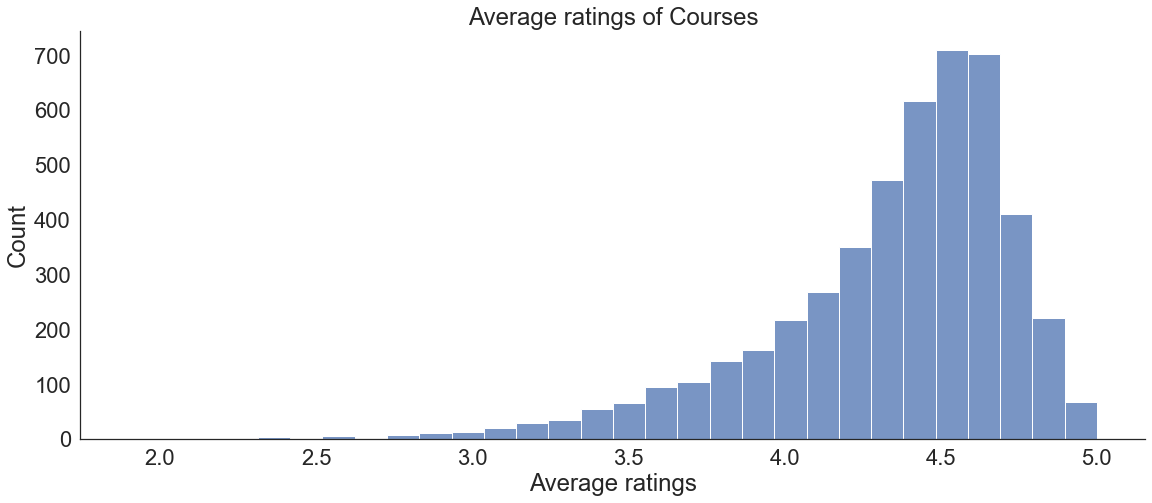

In [20]:
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17,7) #default plot size to output

sns.set_theme(context='notebook',
              style='white',
              font_scale=2,
              rc={'axes.spines.right': False,'axes.spines.top': False} )

# histogram

ax=sns.histplot(online_course['reviews_avg'], bins=30, kde=False);

# remove the top and right lines
sns.despine()

# add title and axis labels (modify x-axis label)
ax.set_title('Average ratings of Courses')
ax.set_ylabel('Count')
ax.set_xlabel('Average ratings');

We can see that the average ratings is a little bit left skewed. Most of the average ratings is around 4.5. Very few courses' have average ratings around 2.0. Comparing to other average ratings we have, 2.5 seems to be the outlier.

After having a basic understanding towards the average ratings, we will take a further look into the relationships betweem different variables. 

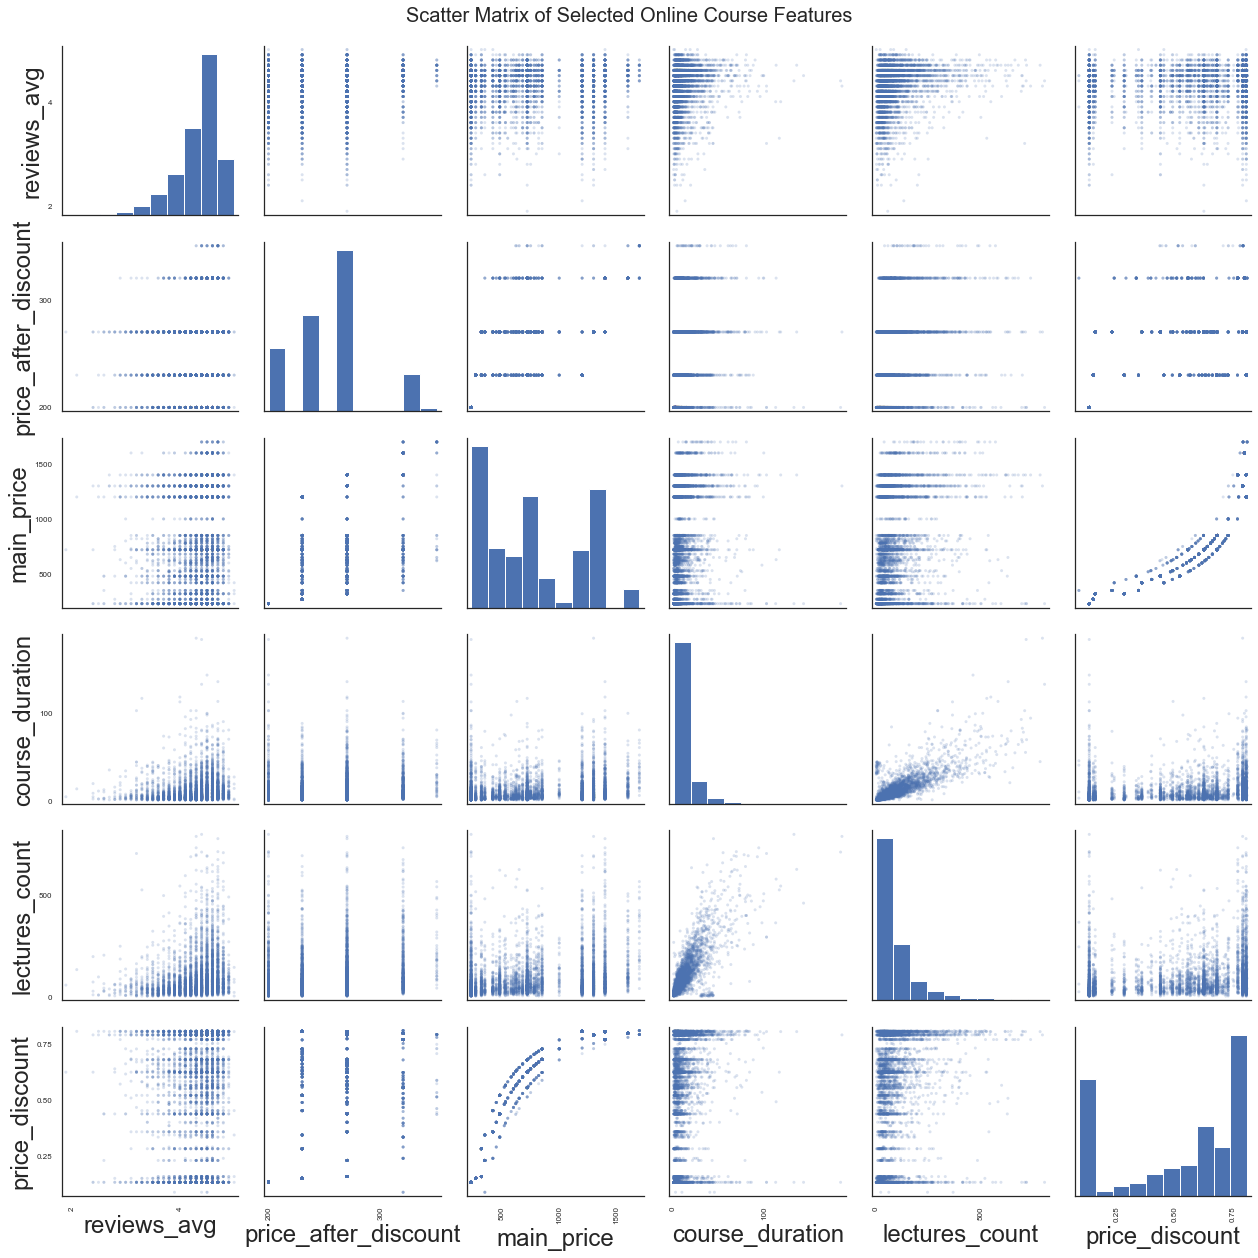

In [21]:
selected_columns = ['reviews_avg', 'price_after_discount', 'main_price', 'course_duration','lectures_count','price_discount']
scatter_matrix(online_course[selected_columns], alpha=0.2, figsize=(18, 18), diagonal='hist')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.suptitle('Scatter Matrix of Selected Online Course Features', size=20)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

From the above scatter matrix, we can see that reviews_avg seems to have correlations between 'main_price', 'course_duration','lectures_count', and 'price_discount.' So we will look at each of these variables seperately below. 

**review_avg v.s. main course price**

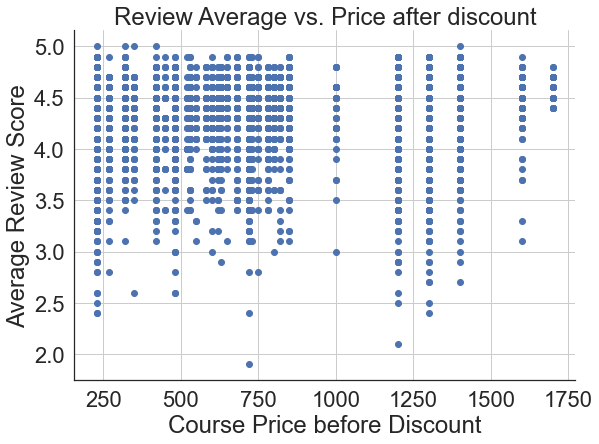

In [22]:
# scatter plot: 1. review_avg v.s. main course price
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(online_course['main_price'], online_course['reviews_avg'])
ax.set_xlabel('Course Price before Discount')
ax.set_ylabel('Average Review Score')
ax.set_title('Review Average vs. Price after discount')
ax.grid(True)
plt.show()

Text(0.5, 0.98, 'Average Review Score vs. Price after discount')

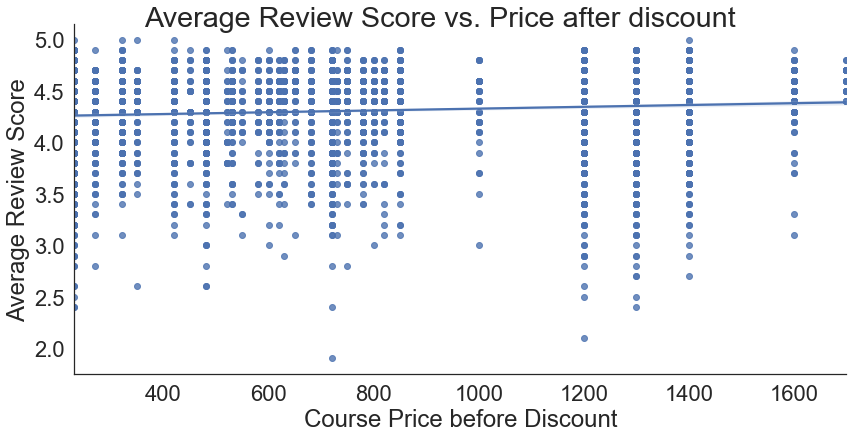

In [23]:
plot1=sns.lmplot(x = "main_price" , y = "reviews_avg", data = online_course, aspect = 2, height = 6)
plot1.set_axis_labels('Course Price before Discount', 'Average Review Score')

plot1.fig.suptitle('Average Review Score vs. Price after discount')

From the scatterplot and linear regression line above, we can see that changes in course price after discount might not affect average review scores with a significant amount. 

**review_avg v.s. course duration**

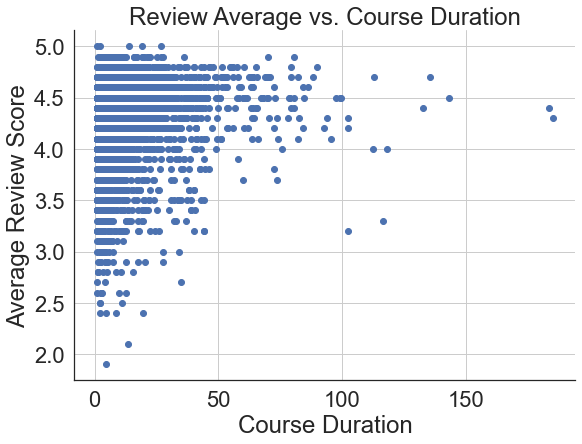

In [24]:
# plot of review_avg v.s. course duration
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(online_course['course_duration'], online_course['reviews_avg'])
ax.set_xlabel('Course Duration')
ax.set_ylabel('Average Review Score')
ax.set_title('Review Average vs. Course Duration')
ax.grid(True)
plt.show()

Since the data seems to be clustered on the left, we will take the log of course duration

Text(0.5, 0.98, 'Average Review Score vs. Course duration log')

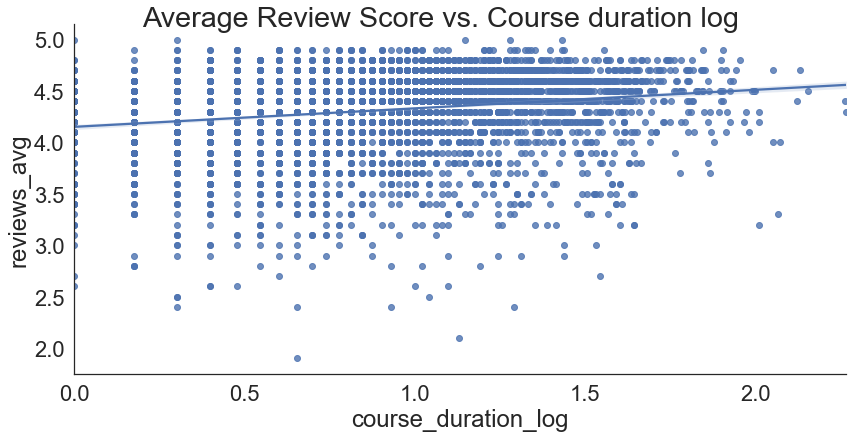

In [25]:
o=online_course.copy()
o['course_duration_log'] = np.log10(o['course_duration'])
plot2=sns.lmplot(x = "course_duration_log" , y = "reviews_avg", data = o, aspect = 2, height = 6)
plot2.fig.suptitle('Average Review Score vs. Course duration log')

From the above linear regression plot and scatter plot, we can see that the as course_duration increases, reviews_avg also seems to be increasing. 

**reviews_avg v.s. lectures_Count**

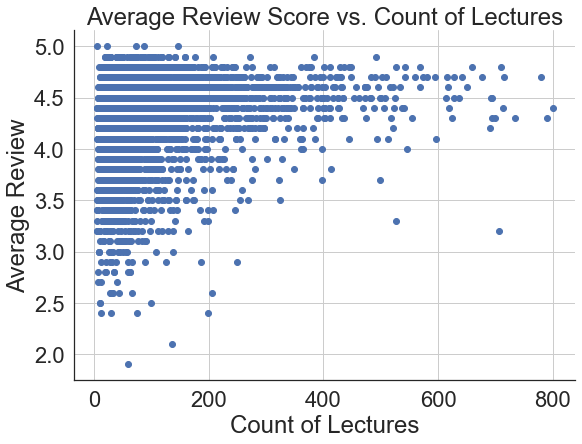

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(online_course['lectures_count'], online_course['reviews_avg'])
ax.set_xlabel('Count of Lectures')
ax.set_ylabel('Average Review')
ax.set_title('Average Review Score vs. Count of Lectures')
ax.grid(True)
plt.show()

Similar to the previous one, most of the data points clustered at the left of the graph. So we will first take log of count of lectures

Text(0.5, 0.98, 'Average Review Score vs. Lecutures Count Log')

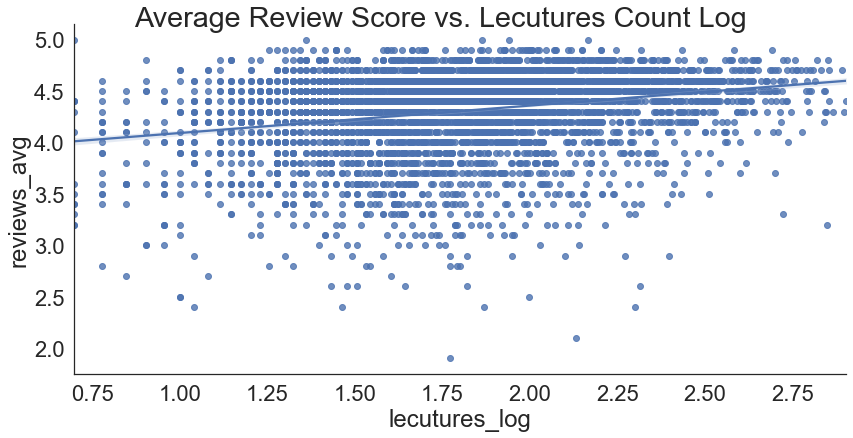

In [27]:
o=online_course.copy()
o['lecutures_log'] = np.log10(o['lectures_count'])
plot3=sns.lmplot(x = "lecutures_log" , y = "reviews_avg", data = o, aspect = 2, height = 6)
plot3.fig.suptitle('Average Review Score vs. Lecutures Count Log')

From the above linear regression plot and scatter plot, we can see that the as lectures count increases, reviews_avg also seems to be increasing.

**reviews_avg v.s. price_discount**

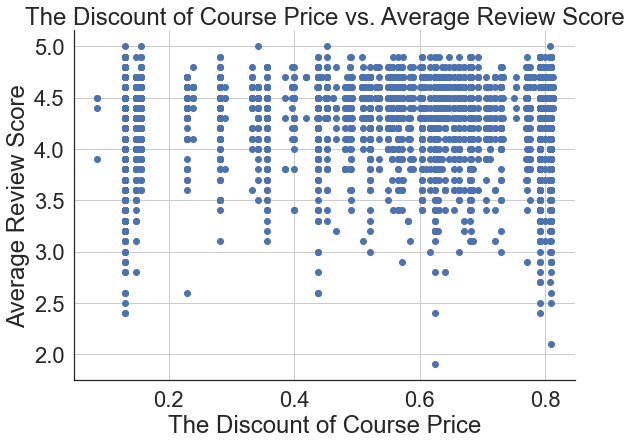

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(online_course['price_discount'], online_course['reviews_avg'])
ax.set_xlabel('The Discount of Course Price')
ax.set_ylabel('Average Review Score')
ax.set_title('The Discount of Course Price vs. Average Review Score')
ax.grid(True)
plt.show()

Text(0.5, 0.98, 'Average Review Score vs. Discount of Course Price')

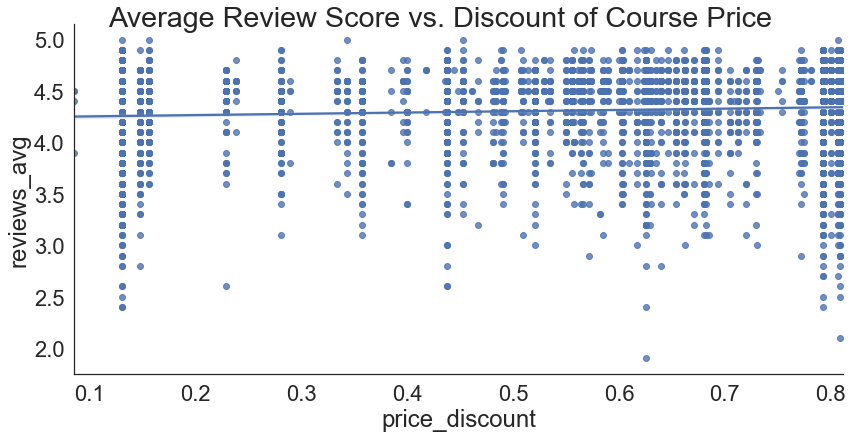

In [29]:

plot4=sns.lmplot(x = "price_discount" , y = "reviews_avg", data = online_course, aspect = 2, height = 6)
plot4.fig.suptitle('Average Review Score vs. Discount of Course Price')

From the scatter plots and linear regression above, we can see the there doesn't seem to be any strong linear relationship between price_discount and reveiws average. 

Now, we want to see if whether our categorical varibles-- course level difficulty -- could provide us with more information on reviews score. 

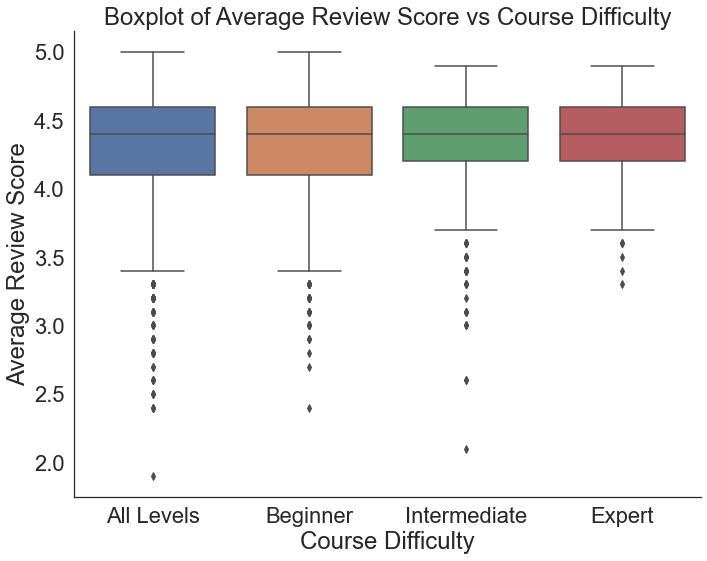

In [30]:

plt.figure(figsize=(10, 8))
sns.boxplot(x='level', y='reviews_avg', data=online_course)

plt.title('Boxplot of Average Review Score vs Course Difficulty')
plt.xlabel('Course Difficulty')
plt.ylabel('Average Review Score')
plt.show()

In [31]:
# Create the pivot table
pivot_table = online_course.pivot_table(values='reviews_avg', index='level', aggfunc='mean')

# Display the pivot table
print(pivot_table)

              reviews_avg
level                    
All Levels       4.306950
Beginner         4.292339
Expert           4.347297
Intermediate     4.342388


From the above boxplot, we can see that the median of the average review score across different course difficulty are roughly the same. However, the distributions of average review scores are different across 4 levels. This might be caused by differnt scores distributions across each difficulty level. For now, we hypothesis that course difficulty might affect reviews scores. However, we will explore this further with a hypothesis later. 

Before hypothesis testing, we want to first look at the linear regression between 'course_duration','lectures_count', and review scores of the courses. 

**linear regression between reviews_avg and course_duration**

In [32]:
o=online_course.copy()
o['course_duration_log'] = np.log10(o['course_duration'])
outcome1, predictors1 = patsy.dmatrices('reviews_avg ~ course_duration_log', o)
model1 = sm.OLS(outcome1, predictors1)


## fit the model
results1 = model1.fit()

## look at the results
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:            reviews_avg   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     183.1
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           5.68e-41
Time:                        22:57:46   Log-Likelihood:                -2208.4
No. Observations:                4796   AIC:                             4421.
Df Residuals:                    4794   BIC:                             4434.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.1514    

***The linear regression indicates the relationship between the average review and the log of course duration can be linearly fitted as reviews_avg= 4.1514 + 0.18 * (course_duration_log). With this equation, when the course_duration_log is equal to 0, the average review would be 4.1514. And for every 1 unit increase in log of course duration, we would expect an increase of 0.18 units in the average review scores.***


**linear regression between reviews_avg and lectures_count**

In [33]:
o=online_course.copy()
o['lectures_count_log'] = np.log10(o['lectures_count'])
outcome2, predictors2 = patsy.dmatrices('reviews_avg ~ lectures_count_log', o)
model2 = sm.OLS(outcome2, predictors2)


## fit the model
results2 = model2.fit()

## look at the results
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:            reviews_avg   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     349.0
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           3.17e-75
Time:                        22:57:46   Log-Likelihood:                -2129.8
No. Observations:                4796   AIC:                             4264.
Df Residuals:                    4794   BIC:                             4277.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              3.8244      0

***The linear regression indicates the relationship between the average review and the log of lectures count can be linearly fitted as reviews_avg= 3.8244 + 0.267 * lectures_count_log). With this equation, when the lectures_count_log is equal to 0, the average review would be 3.8244. And for every 1 unit increase in log of lectures count, we would expect an increase of 0.267 units in the average review scores.***


In [34]:
o=online_course.copy()
o['course_duration_log'] = np.log10(o['course_duration'])
o['lectures_count_log'] = np.log10(o['lectures_count'])
import statsmodels.formula.api as smf
mod = smf.ols(formula='course_duration_log ~ lectures_count_log', data=o)  
res = mod.fit()
print(res.summary())

                             OLS Regression Results                            
Dep. Variable:     course_duration_log   R-squared:                       0.617
Model:                             OLS   Adj. R-squared:                  0.616
Method:                  Least Squares   F-statistic:                     7709.
Date:                 Sun, 04 Jun 2023   Prob (F-statistic):               0.00
Time:                         22:57:46   Log-Likelihood:                -303.22
No. Observations:                 4796   AIC:                             610.4
Df Residuals:                     4794   BIC:                             623.4
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.6

With R-squared and Adj R-squared being 0.617, we can see that there're multi-conlinearity between course_duration_log and lectures_count_log. Therefore we won't use both course_duration_log and lectures_count_log as our predictors. 

**Hypothesis test**

To investigate the relationship between average review points and course difficulty level, we hope to conduct a hypothesis test to verify if there is a statistically significant difference between review points that can be accounted for by course fifficulty level. Our hypotheses are:

- Null Hypothesis (H0): The mean review scores are the same across all difficulty levels.
- Alternative Hypothesis (H1): At least one difficulty level has a different mean review score.

We plan to perform a one-way ANOVA test on the two variables. Before using an ANOVA test, it is important to check if our data meet the following assumptions for ANOVA:

- Randomness and Independence
- Assumption of Normality
- Homogeneity of Variance
- Dependent Variable Is Continuous

### 1. Assumption of Normality - satisfied
To make sure the sample data is randomly selected from the population data, we used sample() to select a random 50% sample of the online_course dataframe without replacement:

In [35]:
sample_df = online_course.sample(frac=0.5, replace=True, random_state=0)
sample = sample_df[["reviews_avg", "level"]]

In this way, each observation is randomly selected and thus independent from other observations.

### 2. Assumption of Normality - satisfied
To conduct ANOVA test, we need to make sure samples are drew from a normally distributed population. We used a Shapiro-Wilk test to look for normality. The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

To conduct ANOVA test, we need to make sure samples are drew from a normally distributed population. We used a Shapiro-Wilk test to look for normality. The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.


In [36]:
print("\nShapiro-Wilk test results:")
levels = sample['level'].unique()
for level in levels:
    shapiro_test = stats.shapiro(sample[sample['level'] == level]['reviews_avg'])
    print(f"For level {level}: Test-statistic = {shapiro_test.statistic}, p-value = {shapiro_test.pvalue}")
print("For each level, if p-value < 0.05, we reject the null hypothesis of normality.")




Shapiro-Wilk test results:
For level All Levels: Test-statistic = 0.899412989616394, p-value = 1.9371695511720582e-28
For level Beginner: Test-statistic = 0.9160410165786743, p-value = 4.452816634949517e-19
For level Intermediate: Test-statistic = 0.8759912252426147, p-value = 1.367770406729421e-16
For level Expert: Test-statistic = 0.8829064965248108, p-value = 0.0012016022810712457
For each level, if p-value < 0.05, we reject the null hypothesis of normality.


### 3. Homogeneity of Variance
To ensure that variances of dependent variable are roughly equal between treatment groups, we calculate a ratio of the largest to the smallest sample standard deviation for dependent variable reviews_avg.

In [37]:
std_devs = sample.groupby('level')['reviews_avg'].std()
ratio = std_devs.max() / std_devs.min()
print("\nRatio of largest to smallest standard deviation: ", ratio)

levene_test = levene(*[group['reviews_avg'].values for name, group in sample.groupby('level')])
print(f"Levene's Test: Test-statistic = {levene_test.statistic}, p-value = {levene_test.pvalue}")
print("If p-value < 0.05, we reject the null hypothesis of equal variances.")


Ratio of largest to smallest standard deviation:  1.0896635281301723
Levene's Test: Test-statistic = 0.2552140502216221, p-value = 0.857657156589797
If p-value < 0.05, we reject the null hypothesis of equal variances.


### 4. Dependent Variable Is Continuous - satisfied
We want to know how course difficulty may influence average review, so average review is the dependent variable. It contains scores from 0 to 5 in a float type, as to be checked as following:

In [38]:
sample.dtypes

reviews_avg    float64
level           object
dtype: object

The assumption for the dependent variable to be continuous is satisfied.

### One-way ANOVA Test
Finally, we conducted the one-way ANOVA test to examine if there is a statistically significant difference in average review scores across different course difficulty levels.

In [39]:

print("\nOne-way ANOVA Test:")
anova_result = stats.f_oneway(sample['reviews_avg'][sample['level'] == 'All Levels'],
               sample['reviews_avg'][sample['level'] == 'Beginner'],
               sample['reviews_avg'][sample['level'] == 'Intermediate'],
               sample['reviews_avg'][sample['level'] == 'Expert'])
print(f"F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


One-way ANOVA Test:
F-statistic = 0.9143367508951432, p-value = 0.4331348735692875


In [40]:
model = ols('reviews_avg ~ C(level)', data=sample).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(level),0.391685,3.0,0.914337,0.433135
Residual,341.848299,2394.0,NaN,NaN


In [41]:
if anova_result.pvalue < 0.05:
    print("\nThere is a statistically significant difference in average review points that can be attributed to difficulty levels. We reject the null hypothesis.")
else:
    print("\nThere is no statistically significant difference in average review points that can be attributed to difficulty levels. We cannot reject the null hypothesis.")


There is no statistically significant difference in average review points that can be attributed to difficulty levels. We cannot reject the null hypothesis.


# Ethics & Privacy

To ensure ethical and privacy considerations in our project, we have taken the following steps. Firstly, we have selected a dataset with a large sample size of top-rated courses on Udemy, which is one of the most popular and representative online education platforms. The dataset has been anonymized, and personal identifiers have been removed, so the privacy of participants is well conserved. Also, since the data is collected from the students who are taking the courses over the internet, the geographic and socio-economical factors will not act as significant roles in our analysis and prediction. Our focus will be mainly on the courses themselves. In addition, our dataset does not contain any personal identifiers from the students, so the privacy of participants is well conserved.
Overall, we recognize that conducting a data science project on predicting the rating to online courses requires careful consideration of ethical and privacy concerns. We will take all necessary steps to ensure that our analysis is fair, transparent, and unbiased. 

# Conclusion & Discussion

*Fill in your discussion information here*
 1. Discuss your project/intro/background   (frank)
 2. Summarize your data and question. (yunfei)
 3. Briefly describe your analysis. Summarize your results and conclusions. (Luming) 
 4. Be sure to mention any limitations of your project. Discuss the impact of this work on society. (~2-3 paragraphs) (Haowei)

# Team Contributions

*Specify who in your group worked on which parts of the project.*